In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
earthquake = pd.read_csv('datasets/earthquakes.csv', parse_dates = True, index_col='date')

In [3]:
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


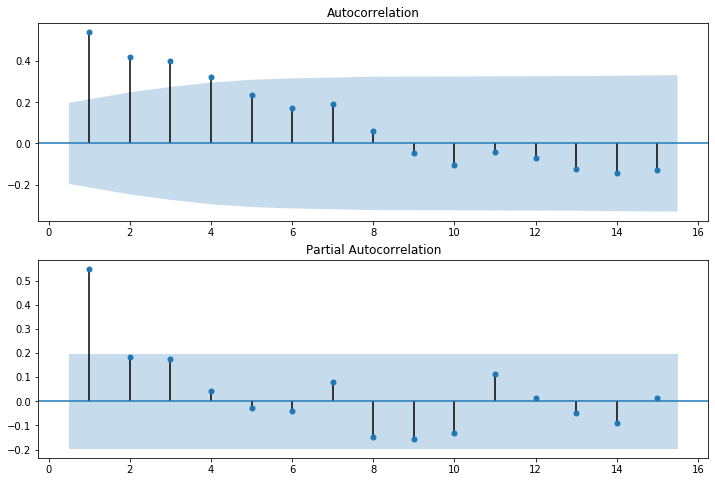

In [4]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake['earthquakes_per_year'],lags=15, zero=False, ax=ax1)
plot_pacf(earthquake['earthquakes_per_year'],lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
model = SARIMAX(earthquake['earthquakes_per_year'], order=(1,0,0))
result = model.fit()

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Sun, 12 Apr 2020   AIC                            666.646
Time:                          17:44:17   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
===================================================================================
Ljung-Box (Q):                       51.06   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.11   Prob(JB):                         0.10
Heteroskedasticity (H):               0.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# AIC & BIC

In [41]:
df = earthquake['earthquakes_per_year']

In [42]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred 

In [26]:
print(order_aic_bic)

[(0, 0, 888.4297722924081, 891.0248921425426), (0, 1, 799.6741727812077, 804.864412481477), (0, 2, 761.0674787503885, 768.8528383007923), (1, 0, 666.6455255041611, 671.8357652044303), (1, 1, 647.1322999673836, 654.9176595177873), (1, 2, 648.7385664620866, 659.119045862625), (2, 0, 656.0283744146392, 663.813733965043), (2, 1, 648.8428399959726, 659.2233193965109), (2, 2, 648.8506443436071, 661.8262435942801)]


# model diagnostic

In [43]:
earthquake=pd.read_csv('datasets/earthquakes.csv', parse_dates=True, index_col='date')
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


In [44]:
earthquake.drop(['Year'], axis=1,inplace=True)

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.755625671846906


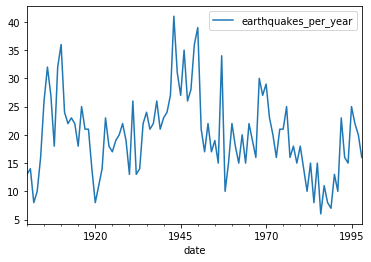

In [45]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

Prob(Q) is larger than 0.05. We shouldn't reject the null that the residuals are uncorrelated.
Remember that we reject the null hypothesis if is the p-value is less than 0.05.

Test -- Good fit
Standardized residual -- There are no obvious patterns in the residuals
Histogram plus kde estimate -- The KDE curve should be very similar to the normal distribution
Normal Q-Q -- Most of the data points should lie on the straight line
Correlogram	-- 95% of correlations for lag greater than one should not be significant
